In [1]:
import pandas as pd #Importing neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Preprocessing

In [2]:
blogs_data=pd.read_csv('blogs.csv') #Reading the data
blogs_data.head() #Displaying the first 5 rows of the data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
blogs_data.shape #Displaying the shape of the data

(2000, 2)

In [4]:
blogs_data.info() #Displaying the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
blogs_data.isnull().sum() #Checking for missing values

,0
Data,0
Labels,0


In [6]:
blogs_data.describe() #Displaying the summary statistics of the data

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [7]:
blogs_data.duplicated().sum() #Checking for duplicate values

0

In [8]:
len(blogs_data['Data'].value_counts()) #Displaying the sum of value counts of the data column

2000

In [9]:
len(blogs_data['Labels'].value_counts()) #Displaying the sum of value counts of the labels column

20

In [10]:
blogs_data['Labels'].value_counts() #Displaying the value counts of the labels column

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


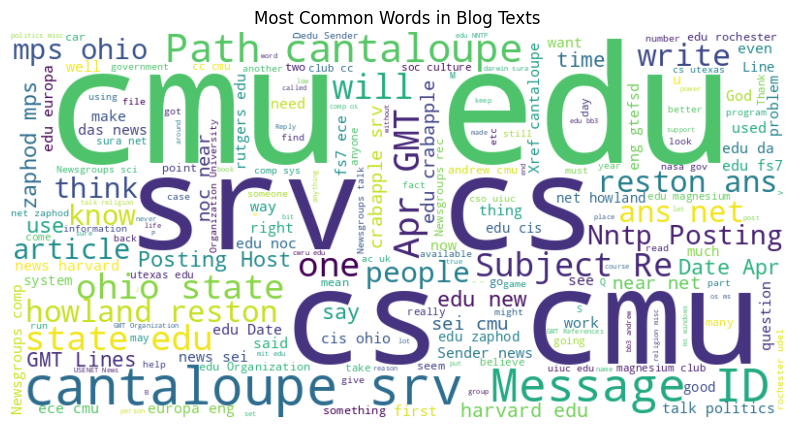

In [11]:
from wordcloud import WordCloud #Importing wordcloud


all_text = ' '.join(blogs_data['Data']) # Combine all the blog texts into one string


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text) # Generate the word cloud
plt.figure(figsize=(10, 6)) # Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

In [12]:
!pip install pandas nltk

In [13]:
import re #Importing regular expressions
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [16]:
# Apply preprocessing to the 'Data' column
blogs_data['Cleaned_Data'] = blogs_data['Data'].apply(preprocess_text)

# Save the cleaned dataset to a new file
blogs_data.to_csv('cleaned_blogs.csv', index=False)

# Display a sample of the cleaned data
blogs_data[['Data', 'Cleaned_Data']].head()

,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,"[newsgroups, altatheism, path, cantaloupesrvcs..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,"[xref, cantaloupesrvcscmuedu, altatheism53485,..."


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer #Importing TFIDF Vectorizer

TfIdf = TfidfVectorizer() #Initializing TFIDF Vectorizer

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = TfIdf.fit_transform(blogs_data['Data'])

# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (2000, 51404)


In [34]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, blogs_data['Labels'], test_size=0.2, random_state=42)


# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 51404)
Shape of X_test: (400, 51404)
Shape of y_train: (1600,)
Shape of y_test: (400,)


# Naive Bayes Model for Text Classification

In [35]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the Naive Bayes model
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'sci.electronics', 'rec.sport.baseball', 'talk.politics.mideast',
       'alt.atheism', 'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc', 'misc.forsale',
       'talk.politics.misc', 'alt.atheism', 'rec.sport.hockey',
       'alt.atheism', 'sci.crypt', 'sci.crypt', 'rec.sport.baseball',
       'rec.autos', 'alt.atheism', 'misc.forsale', 'rec.sport.hockey',
       'sci.crypt', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'rec.sport.hockey',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'talk.religion.misc',
       'soc.religion.christian', 'rec.motor

In [36]:
# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 51404)
Shape of X_test: (400, 51404)
Shape of y_train: (1600,)
Shape of y_test: (400,)


# Sentiment Analysis

In [37]:
nltk.download('vader_lexicon') #Downloading vader lexicon

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [39]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [40]:
# Function to categorize sentiment
def get_sentiment(text):
    # Get the sentiment scores for the text
    sentiment_score = sia.polarity_scores(text)['compound']
    # Classify sentiment based on the score
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [28]:
# Apply sentiment analysis to the 'Data' column
blogs_data['Sentiment'] = blogs_data['Data'].apply(get_sentiment)

# Examine the distribution of sentiments
sentiment_distribution = blogs_data['Sentiment'].value_counts()

# Print sentiment distribution
sentiment_distribution

,count
Sentiment,
positive,1334
negative,631
neutral,35


In [29]:
blogs_data.head()

,Data,Labels,Cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,"[newsgroups, altatheism, path, cantaloupesrvcs...",positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,"[xref, cantaloupesrvcscmuedu, altatheism53485,...",positive


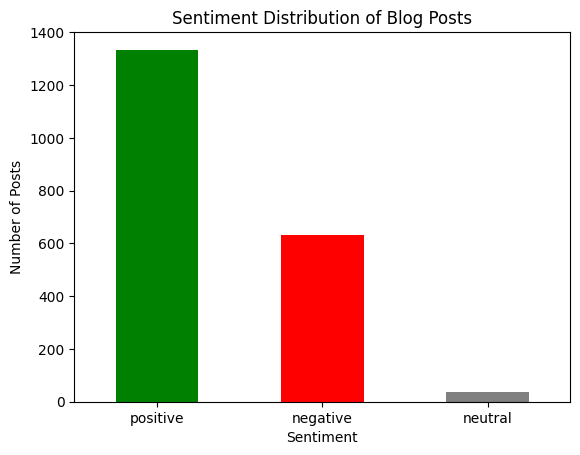

In [30]:
# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [31]:
sentiments = []  # Initialize a list to store sentiment labels
# Evaluate sentiment distribution across different categories
sentiment = blogs_data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:")
sentiment


Sentiment Distribution Across Categories:


Sentiment,negative,neutral,positive
Labels,,,
alt.atheism,42,1,57
comp.graphics,13,4,83
comp.os.ms-windows.misc,24,2,74
comp.sys.ibm.pc.hardware,21,0,79
comp.sys.mac.hardware,24,3,73
comp.windows.x,20,2,78
misc.forsale,7,8,85
rec.autos,27,1,72
rec.motorcycles,30,2,68


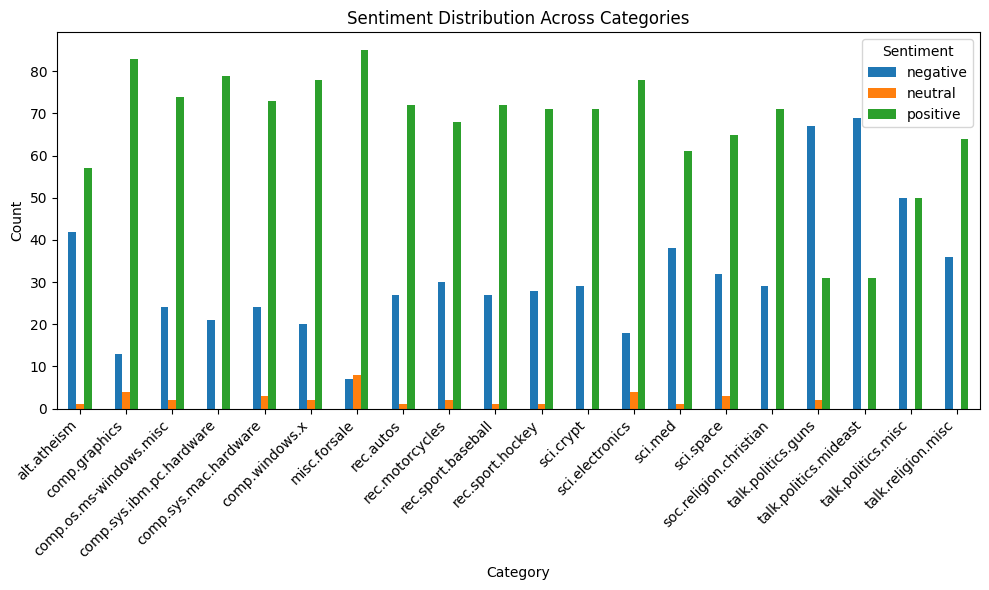

In [32]:
# plot grouped bar chart for sentiment
sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

**Findings**:

The sentiment analysis results provide a lens through which to interpret the blog content's tone and thematic focus:

Positive posts create an optimistic and motivational atmosphere.

Negative posts tackle challenges or concerns, fostering a critical or solution-oriented mindset.

Neutral posts focus on objectivity and information, appealing to readers who prefer factual content.

These results can help shape a balanced, engaging content strategy that meets the diverse expectations of the audience.